# MATH 210 Introduction to Mathematical Computing

## November 8, 2019

* Applications to simple undirected graphs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import networkx as nx

Let $G$ be a simple undirected graph and let $A$ be the adjacency matrix. Then the matrix powers $A^k$ have a [beautiful property](https://en.wikipedia.org/wiki/Adjacency_matrix#Matrix_powers): the number of walks of length $k$ in $G$ from vertex $i$ to $j$ is the $i,j$ entry of $A^k$. A [walk](https://en.wikipedia.org/wiki/Path_(graph_theory)) is simply a sequence of connected vertices in a graph and the length is the number of edges (or steps) between the vertices.

Let's try a simple example with the triangle:

In [2]:
G1 = nx.complete_graph(3)

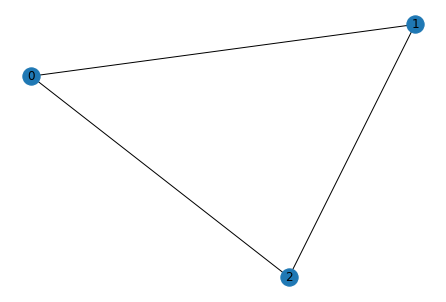

In [4]:
nx.draw(G1,with_labels=True)

In [5]:
A1 = nx.adjacency_matrix(G1).todense()
print(A1)

[[0 1 1]
 [1 0 1]
 [1 1 0]]


Let's compute the number of walks of length 3:

In [8]:
A1@A1@A1

matrix([[2, 3, 3],
        [3, 2, 3],
        [3, 3, 2]], dtype=int64)

For example, the 3 walks of length 3 from vertex 0 to 2 are: (0,1,0,2), (0,2,0,2), (0,2,1,2).

Let's try the [dodecahedral graph](https://en.wikipedia.org/wiki/Regular_dodecahedron#Dodecahedral_graph):

In [9]:
G2 = nx.dodecahedral_graph()

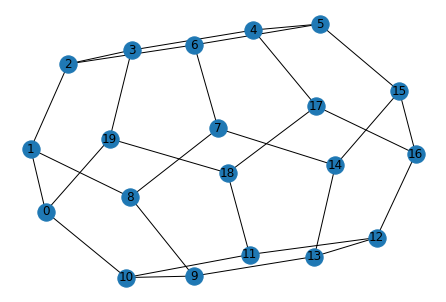

In [11]:
nx.draw(G2,with_labels=True)

What is the length of the shortest path fom vertex $0$ and $15$? Find the smallest positive integer $k$ such that $A^k$ such that the $0,15$ entry is non-zero.

In [12]:
A2 = nx.adjacency_matrix(G2).todense()

In [13]:
Ak = A2
for k in range(2,6):
    Ak = Ak @ A2
    if Ak[0,15] > 0:
        break
print(k)

5


What is the length of the longest shortest path? Find the smallest positive integer $k$ such that for each $i,j$ there is an interger $\ell \leq k$ such that $A^{\ell}_{i,j} \not=0$.

We can use the matrix

$$
M_k = A + A^2 + \cdots + A^k
$$

to record all the walks of length *less than or equal to k*. Find the smallest $k$ such that all the entries of $M_k$ are non-zero.

In [15]:
Ak = A2
Mk = A2
for k in range(2,A2.size):
    Ak = Ak @ A2
    Mk = Mk + Ak
    if np.count_nonzero(Mk) == A2.size:
        break
print(k)

5


Let's find the longest shortest path in the ladder graph.

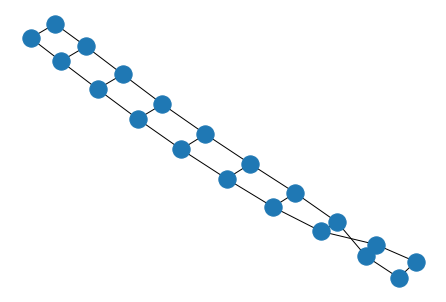

In [17]:
G3 = nx.ladder_graph(10)
nx.draw(G3)

In [18]:
A3 = nx.adjacency_matrix(G3).todense()
Ak = A3
M = A3
for k in range(2,A3.size):
    Ak = Ak @ A3
    M = M + Ak
    if np.count_nonzero(M) == A3.size:
        break
print(k)

10


And for the Petersen graph.

In [23]:
G4 = nx.petersen_graph()
A4 = nx.adjacency_matrix(G4).todense()

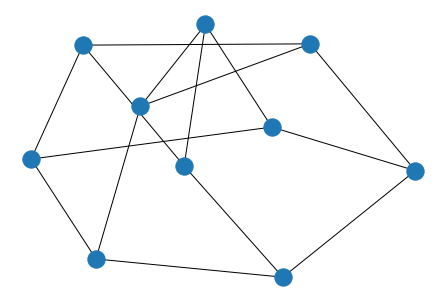

In [25]:
nx.draw(G4)

In [26]:
Ak = A4
M = A4
for k in range(2,A4.size):
    Ak = Ak @ A4
    M = M + Ak
    if np.count_nonzero(M) == A4.size:
        break
print(k)

2
